<a href="https://colab.research.google.com/github/reflectormensah/Financial-Engineering-Data-Science/blob/main/Treasury_Bills_Forecasting_with_MPR(Granger_Causalitty).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
! pip install arch
! pip install statsmodels

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 985.1/985.1 kB 8.9 MB/s eta 0:00:00


In [ ]:
# Importing the packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.graphics.tsaplots
from statsmodels.tsa.stattools import adfuller

%matplotlib inline

In [ ]:
from google.colab import files

# manually upload the treasury bills data"
uploaded = files.upload()

Saving 91-day forecast.xlsx to 91-day forecast.xlsx


In [ ]:
data = uploaded['91-day forecast.xlsx']

In [ ]:
from google.colab import files

# manually upload the MPR data"
uploaded = files.upload()

Saving MPR rates.xlsx to MPR rates.xlsx


In [ ]:
data2 = uploaded['MPR rates.xlsx']

In [ ]:
import pandas as pd

data = pd.read_excel('91-day forecast.xlsx') # Use read_excel for Excel files
data2 = pd.read_excel('MPR rates.xlsx')
# Convert the 'Date' column to datetime
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date',inplace=True)

data.head()

,Rate
Date,
2014-01-13,0.194
2014-01-20,0.196
2014-01-27,0.196
2014-02-03,0.195
2014-02-10,0.201


In [ ]:
import pandas as pd

# Assuming 'Unnamed: 0' is your date column
data2['Date'] = pd.to_datetime(data2['Unnamed: 0'], errors='coerce')
# errors='coerce' will handle invalid parsing by setting them to NaT (Not a Time)

# Remove rows with NaT in the 'Date' column, which are likely header rows
data2 = data2.dropna(subset=['Date'])

data2.set_index('Date', inplace=True)
data2.tail()

<ipython-input-43-d8bb071d8bb2>:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data2['Date'] = pd.to_datetime(data2['Unnamed: 0'], errors='coerce')


,Unnamed: 0,Unnamed: 1
Date,,
2024-09-23,2024-09-23 00:00:00,0.29
2024-09-30,2024-09-30 00:00:00,0.27
2024-10-07,2024-10-07 00:00:00,0.27
2024-10-14,2024-10-14 00:00:00,0.27
2024-10-21,2024-10-21 00:00:00,0.27


In [ ]:
import pandas as pd

data2 = pd.read_excel('MPR rates.xlsx')

# Rename 'Unnamed: 0' to 'Date'
data2.rename(columns={'Unnamed: 0': 'Date'}, inplace=True)

# Rename 'Unnamed: 1' to 'MPR'
data2.rename(columns={'Unnamed: 1': 'MPR'}, inplace=True)

# Convert the 'Date' column to datetime
data2['Date'] = pd.to_datetime(data2['Date'], errors='coerce')

# Now you can set 'Date' as the index
data2.set_index('Date', inplace=True)

<ipython-input-44-1316cddcabc0>:12: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data2['Date'] = pd.to_datetime(data2['Date'], errors='coerce')


In [ ]:
import pandas as pd

data2 = pd.read_excel('MPR rates.xlsx')

# If the column names are different, replace them accordingly
data2.rename(columns={'Unnamed: 1': 'MPR'}, inplace=True)

# Assuming 'Unnamed: 0' is your date column, convert to datetime and set as index:
data2['Date'] = pd.to_datetime(data2['Unnamed: 0'], errors='coerce')
data2.set_index('Date', inplace=True)

# errors='coerce' will handle invalid parsing by setting them to NaT (Not a Time)

<ipython-input-45-ee2019e6b9e2>:9: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data2['Date'] = pd.to_datetime(data2['Unnamed: 0'], errors='coerce')


In [ ]:
# Drop the 'Unnamed: 0' column if it exists
if 'Unnamed: 0' in data2.columns:
  data2 = data2.drop('Unnamed: 0', axis=1)

In [ ]:
# Assuming you want to drop the first row of data2:
data2 = data2.iloc[1:]

In [ ]:
data2.head()

,MPR
Date,
2014-01-06,0.16
2014-01-13,0.16
2014-01-20,0.16
2014-01-27,0.16
2014-02-03,0.16


In [ ]:
# Assuming 'data' is your DataFrame with 91-day forecast data
# and 'data2' is your DataFrame with MPR data

# Merge the two DataFrames on the 'Date' index
merged_data = pd.merge(data, data2, left_index=True, right_index=True, how='inner')

# Reset the index to include Date and MPR as columns
merged_data.reset_index(inplace=True)

# Display the updated DataFrame
merged_data.head()

,Date,Rate,MPR
0,2014-01-13,0.194,0.16
1,2014-01-20,0.196,0.16
2,2014-01-27,0.196,0.16
3,2014-02-03,0.195,0.16
4,2014-02-10,0.201,0.18


In [ ]:
merged_data.columns

Index(['Date', 'Rate', 'MPR'], dtype='object')

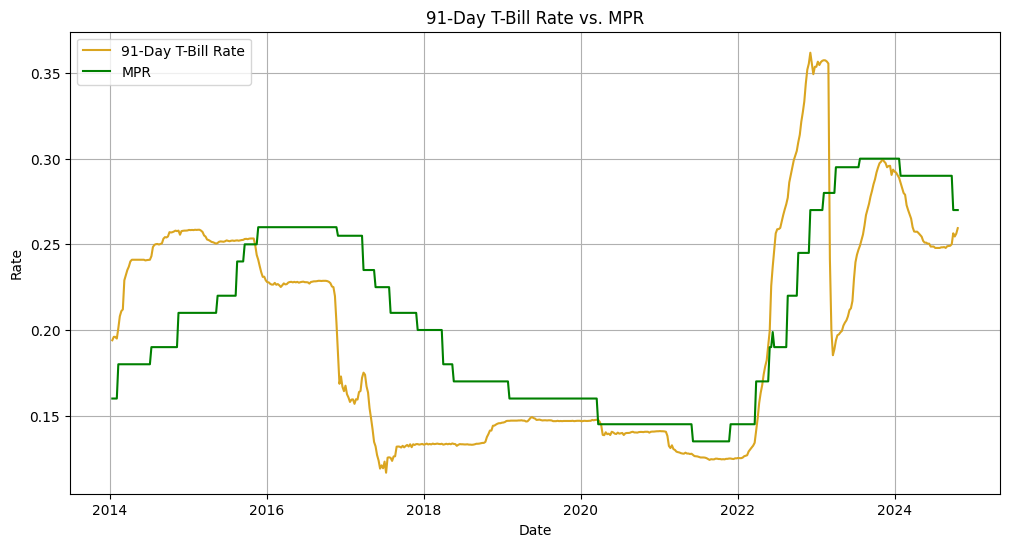

In [ ]:

plt.figure(figsize=(12, 6))
plt.plot(merged_data['Date'], merged_data['Rate'], color= 'goldenrod', label='91-Day T-Bill Rate')
plt.plot(merged_data['Date'], merged_data['MPR'], color='green', label='MPR')
plt.xlabel('Date')
plt.ylabel('Rate')
plt.title('91-Day T-Bill Rate vs. MPR')
plt.legend()
plt.grid(True)
plt.show()

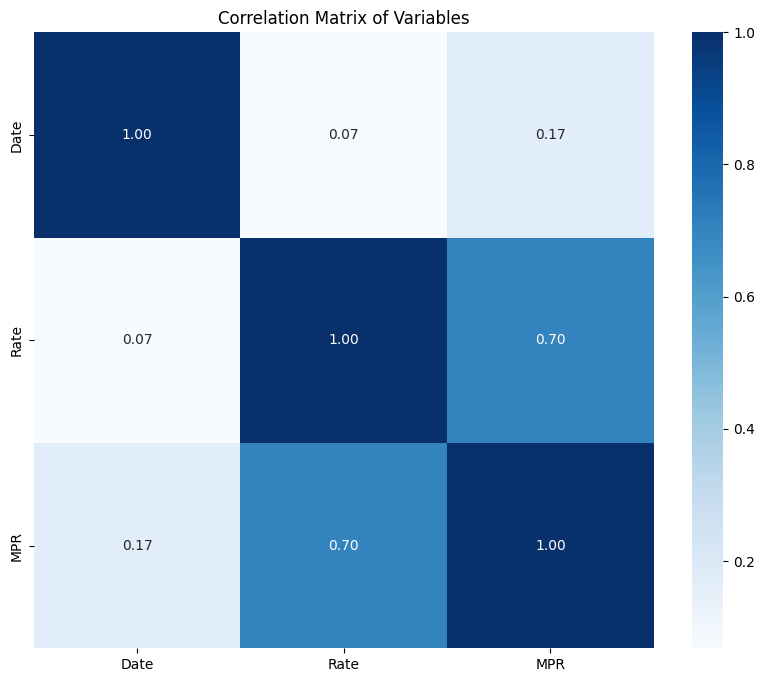

In [ ]:
# Calculate the correlation matrix
correlation_matrix = merged_data.corr()

# Create the heatmap
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 8))
# Change 'greens' to a valid colormap name like 'Greens'
sns.heatmap(correlation_matrix, annot=True, cmap='Blues', fmt=".2f")
plt.title('Correlation Matrix of Variables')
plt.show()

In [ ]:
# Checking Granger Causality
from statsmodels.tsa.stattools import grangercausalitytests

# The maxlag parameter specifies the number of lags to test
grangercausalitytests(merged_data[['Rate', 'MPR']], maxlag=5)


# Thus Rate does not Granger-causes MPR. Rather, the MPR Granger-causes T-Bills rate.


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=3.0923  , p=0.0792  , df_denom=559, df_num=1
ssr based chi2 test:   chi2=3.1089  , p=0.0779  , df=1
likelihood ratio test: chi2=3.1004  , p=0.0783  , df=1
parameter F test:         F=3.0923  , p=0.0792  , df_denom=559, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=2.5417  , p=0.0796  , df_denom=556, df_num=2
ssr based chi2 test:   chi2=5.1292  , p=0.0770  , df=2
likelihood ratio test: chi2=5.1059  , p=0.0779  , df=2
parameter F test:         F=2.5417  , p=0.0796  , df_denom=556, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=2.0398  , p=0.1073  , df_denom=553, df_num=3
ssr based chi2 test:   chi2=6.1968  , p=0.1024  , df=3
likelihood ratio test: chi2=6.1628  , p=0.1040  , df=3
parameter F test:         F=2.0398  , p=0.1073  , df_denom=553, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=2.0308  , p=0.0887  

{1: ({'ssr_ftest': (3.09234579638857, 0.07920849486433135, 559.0, 1),
   'ssr_chi2test': (3.1089415698933394, 0.07786354477672897, 1),
   'lrtest': (3.100373937346376, 0.07827431297757287, 1),
   'params_ftest': (3.0923457963885737, 0.07920849486433135, 559.0, 1.0)},
   array([[0., 1., 0.]])]),
 2: ({'ssr_ftest': (2.54173099772791, 0.07964452994850563, 556.0, 2),
   'ssr_chi2test': (5.129176581745891, 0.07695085629084446, 2),
   'lrtest': (5.105870711255193, 0.07785280460257012, 2),
   'params_ftest': (2.541730997727665, 0.0796445299485218, 556.0, 2.0)},
   array([[0., 0., 1., 0., 0.],
          [0., 0., 0., 1., 0.]])]),
 3: ({'ssr_ftest': (2.039789375354645, 0.10725406839723454, 553.0, 3),
   'ssr_chi2test': (6.196828482090061, 0.10241704638444565, 3),
   'lrtest': (6.162793013261762, 0.10395309140422973, 3),
   'params_ftest': (2.039789375354328, 0.10725406839727937, 553.0, 3.0)},
   array([[0., 0., 0., 1., 0., 0., 0.],
          [0., 0., 0., 0., 1., 0., 0.],
          [0., 0., 0., 0

In [ ]:
from statsmodels.tsa.stattools import grangercausalitytests

# The maxlag parameter specifies the number of lags to test
grangercausalitytests(merged_data[['MPR', 'Rate']], maxlag=5)



Granger Causality
number of lags (no zero) 1
ssr based F test:         F=26.3702 , p=0.0000  , df_denom=559, df_num=1
ssr based chi2 test:   chi2=26.5117 , p=0.0000  , df=1
likelihood ratio test: chi2=25.9054 , p=0.0000  , df=1
parameter F test:         F=26.3702 , p=0.0000  , df_denom=559, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=13.7736 , p=0.0000  , df_denom=556, df_num=2
ssr based chi2 test:   chi2=27.7950 , p=0.0000  , df=2
likelihood ratio test: chi2=27.1283 , p=0.0000  , df=2
parameter F test:         F=13.7736 , p=0.0000  , df_denom=556, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=9.6980  , p=0.0000  , df_denom=553, df_num=3
ssr based chi2 test:   chi2=29.4624 , p=0.0000  , df=3
likelihood ratio test: chi2=28.7135 , p=0.0000  , df=3
parameter F test:         F=9.6980  , p=0.0000  , df_denom=553, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=7.9398  , p=0.0000  

{1: ({'ssr_ftest': (26.370208259958968, 3.8980453555592064e-07, 559.0, 1),
   'ssr_chi2test': (26.511729950083968, 2.619427456814033e-07, 1),
   'lrtest': (25.905394807217817, 3.5856565257726017e-07, 1),
   'params_ftest': (26.370208259959803, 3.8980453555576e-07, 559.0, 1.0)},
   array([[0., 1., 0.]])]),
 2: ({'ssr_ftest': (13.773620653365919, 1.4509699507632716e-06, 556.0, 2),
   'ssr_chi2test': (27.79496829690029, 9.212962893624379e-07, 2),
   'lrtest': (27.12834216803276, 1.2857464876893863e-06, 2),
   'params_ftest': (13.773620653366054, 1.4509699507630886e-06, 556.0, 2.0)},
   array([[0., 0., 1., 0., 0.],
          [0., 0., 0., 1., 0.]])]),
 3: ({'ssr_ftest': (9.698024605942908, 3.0224445092852973e-06, 553.0, 3),
   'ssr_chi2test': (29.46235323324428, 1.7904384944804931e-06, 3),
   'lrtest': (28.713480325151977, 2.5723734539942844e-06, 3),
   'params_ftest': (9.698024605942036, 3.0224445092889696e-06, 553.0, 3.0)},
   array([[0., 0., 0., 1., 0., 0., 0.],
          [0., 0., 0., 0.

The granger causality shows significant F-Statistics  and p-values less than 0.05 for all 5 lages of Rates(TB) data. Thus, MPR contains predictive information for Treasury Bills rates.

In [ ]:
#multiply the values of Rates and MPR by 100

merged_data['Rate'] = merged_data['Rate'] * 100
merged_data['MPR'] = merged_data['MPR'] * 100

In [ ]:
#check the cointegration between Rate and MPR

from statsmodels.tsa.vector_ar.vecm import coint_johansen

# Ensure 'Rate' and 'MPR' columns are numeric
merged_data['Rate'] = pd.to_numeric(merged_data['Rate'])
merged_data['MPR'] = pd.to_numeric(merged_data['MPR'])

# Perform Johansen cointegration test
# Replace 'Rate' and 'MPR' with the actual column names in your DataFrame
result = coint_johansen(merged_data[['Rate', 'MPR']], det_order=0, k_ar_diff=1)

# Print the results
print(result.eig)
print(result.lr1)
print(result.lr2)
print(result.cvt)
result.cvm

# Interpret the results based on eigenvalues and trace statistics
# You can compare the trace statistics with the critical values to determine
# if there is cointegration between the two variables.

[0.05075533 0.00356611]
[31.22591655  2.0041607 ]
[29.22175585  2.0041607 ]
[[13.4294 15.4943 19.9349]
 [ 2.7055  3.8415  6.6349]]


array([[12.2971, 14.2639, 18.52  ],
       [ 2.7055,  3.8415,  6.6349]])

The trace statistic and maximum eigenvalues statistic shows there's a presence of cointegrating relationship.

In [ ]:
# using VAR (Vector Autoregression) model to model the Rates. First divide the data into 80% train and 20% for the test data. Use only train data for the VAR modeling

from statsmodels.tsa.vector_ar.var_model import VAR

# Assuming 'merged_data' is your DataFrame with 'Rate' and 'MPR' columns

# Split the data into training and testing sets (80% train, 20% test)
train_data_len = int(len(merged_data) * 0.8)
train_data = merged_data[['Rate', 'MPR']][:train_data_len]
test_data = merged_data[['Rate', 'MPR']][train_data_len:]

# Fit the VAR model to the training data
model = VAR(train_data)
results = model.fit(maxlags=9, ic='aic')

# Print the summary of the VAR model
print(results.summary())



  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Wed, 06, Nov, 2024
Time:                     11:48:23
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                   -4.96611
Nobs:                     447.000    HQIC:                  -5.04394
Log likelihood:          -115.889    FPE:                 0.00612981
AIC:                     -5.09460    Det(Omega_mle):      0.00594224
--------------------------------------------------------------------
Results for equation Rate
             coefficient       std. error           t-stat            prob
--------------------------------------------------------------------------
const           0.110362         0.052676            2.095           0.036
L1.Rate         1.356427         0.045793           29.621           0.000
L1.MPR          0.161646         0.034329            4.709           0.000
L2.Rate   

In [ ]:
# Forecast the next 'n' steps using the VAR model
lag_order = results.k_ar
forecast_input = train_data.values[-lag_order:]
predictions = results.forecast(y=forecast_input, steps=len(test_data))

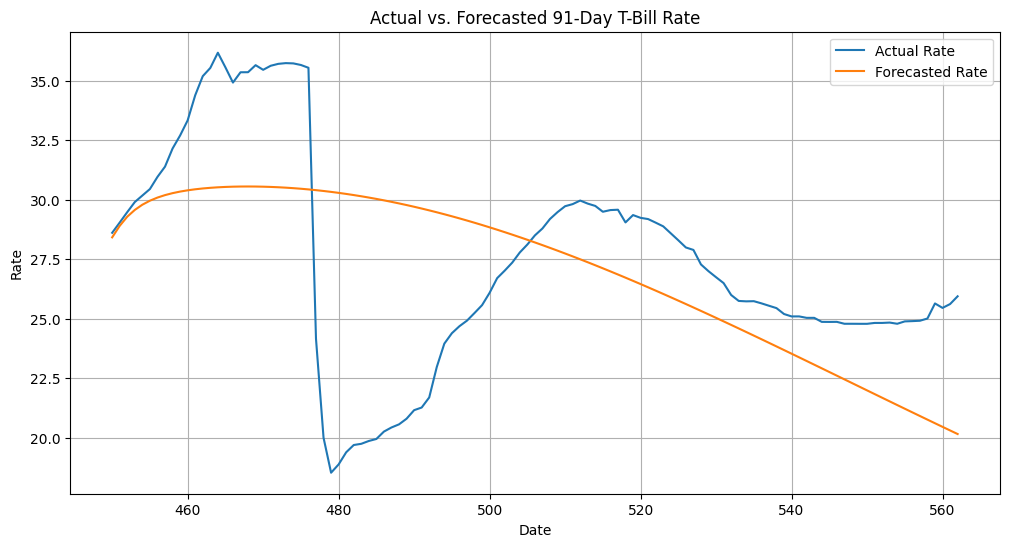

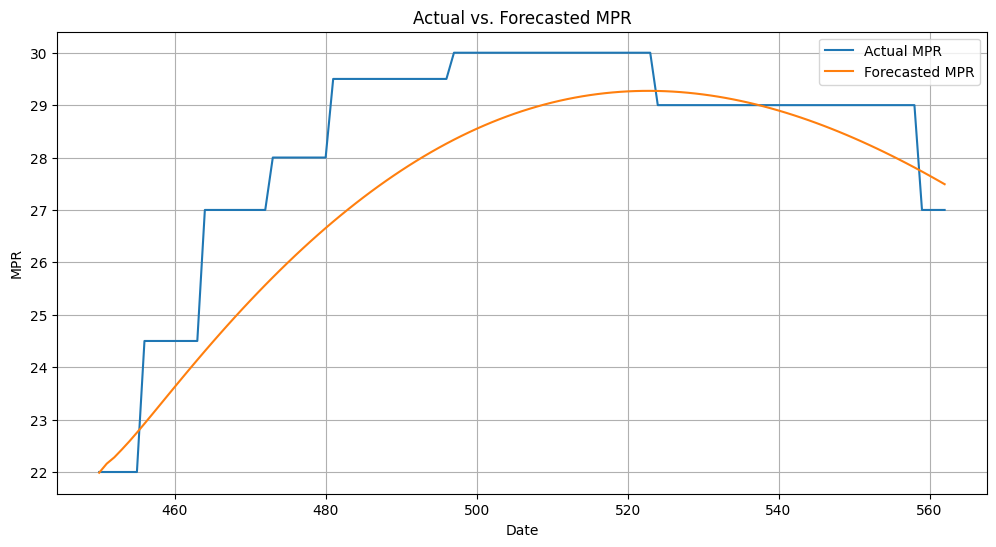

In [ ]:

# Convert predictions to a DataFrame
forecast_df = pd.DataFrame(predictions, index=test_data.index, columns=['Rate_Forecast', 'MPR_Forecast'])

# Plot the actual and forecasted values
plt.figure(figsize=(12, 6))
plt.plot(test_data['Rate'], label='Actual Rate')
plt.plot(forecast_df['Rate_Forecast'], label='Forecasted Rate')
plt.xlabel('Date')
plt.ylabel('Rate')
plt.title('Actual vs. Forecasted 91-Day T-Bill Rate')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(test_data['MPR'], label='Actual MPR')
plt.plot(forecast_df['MPR_Forecast'], label='Forecasted MPR')
plt.xlabel('Date')
plt.ylabel('MPR')
plt.title('Actual vs. Forecasted MPR')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:

# Assuming 'results' is your fitted VAR model and 'lag_order' is the optimal lag order
lag_order = results.k_ar
forecast_input = test_data.values[-lag_order:]

# Create a date range for the next 4 quarters in 2025
start_date = pd.to_datetime('2025-01-01')
end_date = pd.to_datetime('2025-12-31')
forecast_dates = pd.date_range(start=start_date, end=end_date, freq='QE')

# Forecast the next 4 quarters using the VAR model
predictions_2025 = results.forecast(y=forecast_input, steps=len(forecast_dates))

# Create a DataFrame to store the forecasts
forecast_df_2025 = pd.DataFrame(predictions_2025, index=forecast_dates, columns=['Rate_Forecast', 'MPR_Forecast'])

# Print the forecasts
forecast_df_2025

,Rate_Forecast,MPR_Forecast
2025-03-31,26.068612,27.042100
2025-06-30,26.176046,27.036963
2025-09-30,26.211637,27.065963
2025-12-31,26.219679,27.088614


The Vector Autoregression (VAR) forecasts the treasury bills to hover around 26% Treasury Bill rate.

In [ ]:
from statsmodels.tsa.ar_model import AutoReg
import numpy as np
from sklearn.metrics import mean_squared_error

# Define the parameter grid for the ARX model (lag order)
param_grid = {
    'lags': np.arange(1, 10)  # Range of lags to test from 1 to 9
}

# Variables to store the best results
best_score = float('inf')
best_params = None
best_model = None

# Prepare the dataset: separate endogenous and exogenous variables
endog_data = merged_data['Rate']  # Endogenous variable (e.g., 'Rate')
exog_data = merged_data[['MPR']]  # Exogenous variable (e.g., 'MPR')

# Iterate over the grid of parameters to find the best lag configuration
for lags in param_grid['lags']:
    try:
        # Adjust exogenous data length to match the endogenous data after lagging
        exog_data_lagged = exog_data.iloc[lags:]  # Trim exogenous data
        endog_data_lagged = endog_data.iloc[lags:]  # Trim endogenous data

        # Define and fit the ARX model with the specified lag order and exogenous variable
        model = AutoReg(endog_data, lags=lags, exog=exog_data)
        model_fit = model.fit()

        # Generate in-sample predictions to calculate MSE for model evaluation
        predictions = model_fit.predict(start=lags, end=len(endog_data) - 1, exog_oos=exog_data_lagged)
        score = mean_squared_error(endog_data_lagged, predictions)

        # Update the best parameters if the current score is lower (better fit)
        if score < best_score:
            best_score = score
            best_params = {'lags': lags}
            best_model = model_fit

    except Exception as e:
        print(f"Model with lags={lags} failed to fit. Error: {e}")
        continue

# Print the best parameters and score
print("Best Parameters (Lag for Rates and MPR):", best_params)
print("Best Score (MSE):", best_score)

# Print the summary of the best model
if best_model is not None:
    print(best_model.summary())
else:
    print("No model could be fitted successfully.")


Best Parameters (Lag for Rates and MPR): {'lags': 9}
Best Score (MSE): 2894.926069633113
                            AutoReg Model Results                             
Dep. Variable:                   Rate   No. Observations:                  563
Model:                   AutoReg-X(9)   Log Likelihood               -2993.980
Method:               Conditional MLE   S.D. of innovations             53.805
Date:                Wed, 06 Nov 2024   AIC                           6011.960
Time:                        11:10:53   BIC                           6063.766
Sample:                             9   HQIC                          6032.198
                                  563                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          9.1078      9.314      0.978      0.328      -9.147      27.363
Rate.L1        1.3965      0.042     33.14

In [ ]:
from statsmodels.tsa.api import VAR
import numpy as np
from sklearn.metrics import mean_squared_error

# Define the parameter grid for the VAR model (lag order)
param_grid = {
    'lags': np.arange(1, 10)  # Range of lags to test from 1 to 9
}

# Variables to store the best results
best_score = float('inf')
best_params = None
best_model = None

# Prepare the dataset for VAR (assuming 'merged_data' contains your multivariate data)
data = merged_data[['Rate', 'MPR']]  # Select relevant columns for VAR

# Iterate over the grid of parameters
for lags in param_grid['lags']:
    try:
        # Define and fit the VAR model with a specified number of lags
        model = VAR(data)
        model_fit = model.fit(lags)

        # Calculate a score (negative MSE) based on fitted values for evaluation
        forecast = model_fit.fittedvalues
        score = -mean_squared_error(data.iloc[lags:], forecast)

        # Update best parameters if the current score is better
        if score < best_score:
            best_score = score
            best_params = {'lags': lags}
            best_model = model_fit

    except Exception as e:
        print(f"Model with lags={lags} failed to fit. Error: {e}")
        continue

# Print the best parameters and score
print("Best Parameters:", best_params)
print("Best Score (negative MSE):", best_score)

# Print the summary of the best model
if best_model is not None:
    print(best_model.summary())
else:
    print("No model could be fitted successfully.")


Best Parameters: {'lags': 1}
Best Score (negative MSE): -2445.6515866017753
  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Wed, 06, Nov, 2024
Time:                     10:51:09
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                    15.4169
Nobs:                     562.000    HQIC:                   15.3887
Log likelihood:          -5908.05    FPE:                4.73585e+06
AIC:                      15.3707    Det(Omega_mle):     4.68569e+06
--------------------------------------------------------------------
Results for equation Rate
             coefficient       std. error           t-stat            prob
--------------------------------------------------------------------------
const          19.134802        10.310243            1.856           0.063
L1.Rate         1.003332         0.005642          177.831           0.000
L1.MPR   

In [ ]:
from sklearn.model_selection import ParameterGrid
from arch import arch_model

# Define the parameter grid for the GARCH-X model
param_grid = {
    'p': [1, 10],  # Order of the ARCH component
    'q': [1, 10],  # Order of the GARCH component
}

# Create a list to store the results
results = []

# Iterate over the parameter grid
for params in ParameterGrid(param_grid):
    # Create a GARCH-X model with current parameters
    model = arch_model(merged_data['Rate'], vol='Garch', x=merged_data['MPR'], **params)

    try:
        # Fit the model
        model_results = model.fit(disp='off')

        # Store the results
        results.append({
            'params': params,
            'aic': model_results.aic,
            'bic': model_results.bic
        })
    except:
        # Handle cases where the model might not converge
        print(f"Model with parameters {params} failed to converge.")
        continue

# Find the best model based on AIC or BIC
best_model_aic = min(results, key=lambda x: x['aic'])
best_model_bic = min(results, key=lambda x: x['bic'])

print("Best Parameters (AIC):", best_model_aic['params'])
print("Best AIC:", best_model_aic['aic'])
print("Best Parameters (BIC):", best_model_bic['params'])
print("Best BIC:", best_model_bic['bic'])

# Fit the best model (using AIC as an example)
best_model = arch_model(merged_data['Rate'], vol='Garch', x=merged_data['MPR'], **best_model_aic['params'])
best_model_results = best_model.fit(disp='off')
print(best_model_results.summary())

Best Parameters (AIC): {'p': 1, 'q': 1}
Best AIC: 2710.2618681141457
Best Parameters (BIC): {'p': 1, 'q': 1}
Best BIC: 2727.5949866267047
                     Constant Mean - GARCH Model Results                      
Dep. Variable:                   Rate   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -1351.13
Distribution:                  Normal   AIC:                           2710.26
Method:            Maximum Likelihood   BIC:                           2727.59
                                        No. Observations:                  563
Date:                Wed, Nov 06 2024   Df Residuals:                      562
Time:                        11:55:55   Df Model:                            1
                               Mean Model                               
                 coef    std err          t      P>|t|  95.0% Conf. Int.
-----

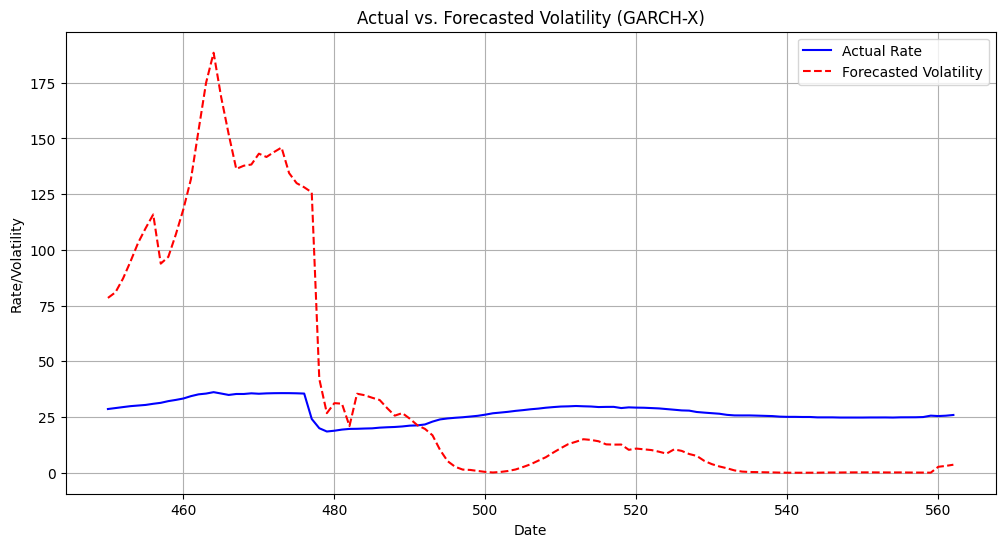

In [ ]:
from arch import arch_model
import matplotlib.pyplot as plt
import pandas as pd

# Convert 'Rate' and 'MPR' columns in merged_data to numeric type
merged_data['Rate'] = pd.to_numeric(merged_data['Rate'], errors='coerce')
merged_data['MPR'] = pd.to_numeric(merged_data['MPR'], errors='coerce')

# Drop rows with NaN values introduced by the conversion
merged_data.dropna(inplace=True)

# Split the data into training (first 80%) and testing (last 20%) sets
train_size = int(len(merged_data) * 0.8)
train_data = merged_data.iloc[:train_size]
test_data = merged_data.iloc[train_size:]

# Perform rolling forecasts with dynamic model updating
forecasted_volatility = []
for i in range(len(test_data)):
    # Dynamically extend the training data
    dynamic_train_data = pd.concat([train_data, test_data.iloc[:i]])

    # Fit the GARCH-X model
    garch_model = arch_model(dynamic_train_data['Rate'], vol='Garch', p=1, q=1, mean='ARX', x=dynamic_train_data[['MPR']])
    garch_x_results = garch_model.fit(disp="off")

    # Prepare exogenous data for forecasting
    # Use the next observation of MPR for the forecast
    exog_forecast = test_data[['MPR']].iloc[[i]]

    # Forecast one step ahead, providing the exogenous data
    forecast = garch_x_results.forecast(horizon=1, start=len(dynamic_train_data) - 1, reindex=False, x=exog_forecast)

    # Append the forecasted volatility only once
    forecasted_volatility.append(forecast.variance.values[-1, 0])

# Plot the actual vs. forecasted volatility
plt.figure(figsize=(12, 6))
plt.plot(test_data.index, test_data['Rate'], label='Actual Rate', color='blue')
plt.plot(test_data.index, forecasted_volatility, label='Forecasted Volatility', linestyle='--', color='red')
plt.xlabel('Date')
plt.ylabel('Rate/Volatility')
plt.title('Actual vs. Forecasted Volatility (GARCH-X)')
plt.legend()
plt.grid(True)
plt.show()

 ### VARMA (to be looked at later)

In [ ]:
# modeled the merged_data with the VARMA on the Rates and MPR

from statsmodels.tsa.statespace.varmax import VARMAX
import pandas as pd

# Assuming 'merged_data' is your DataFrame with both 'Rate' and 'MPR' columns
# and the index is the Date
# Select the columns for the VARMA model
data_for_varma = merged_data[['Rate', 'MPR']]

# Convert the columns to numeric, coercing errors to NaN
data_for_varma['Rate'] = pd.to_numeric(data_for_varma['Rate'], errors='coerce')
data_for_varma['MPR'] = pd.to_numeric(data_for_varma['MPR'], errors='coerce')

# Drop rows with NaN values after conversion
data_for_varma = data_for_varma.dropna()


# Fit the VARMA model (adjust order (p,q) as needed)
model = VARMAX(data_for_varma, order=(1, 1))  # Example with order (1,1)
results = model.fit(disp=False)

# Print the model summary
print(results.summary())

# Forecast the model (adjust steps as needed)
forecast = results.get_forecast(steps=10)

# Extract the forecasted mean and confidence intervals
forecast_mean = forecast.predicted_mean
confidence_intervals = forecast.conf_int()


# You can now use 'forecast_mean' and 'confidence_intervals'
# to analyze and visualize the forecasted rates and MPR.

<ipython-input-28-7818b13887a8>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_for_varma['Rate'] = pd.to_numeric(data_for_varma['Rate'], errors='coerce')
<ipython-input-28-7818b13887a8>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_for_varma['MPR'] = pd.to_numeric(data_for_varma['MPR'], errors='coerce')
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/varmax.py:160: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identificati

                           Statespace Model Results                           
Dep. Variable:        ['Rate', 'MPR']   No. Observations:                  563
Model:                     VARMA(1,1)   Log Likelihood                4490.909
                          + intercept   AIC                          -8955.818
Date:                Fri, 01 Nov 2024   BIC                          -8899.485
Time:                        10:32:01   HQIC                         -8933.827
Sample:                             0                                         
                                - 563                                         
Covariance Type:                  opg                                         
Ljung-Box (L1) (Q):             0.42, 0.01   Jarque-Bera (JB):   2189741.31, 15684.26
Prob(Q):                        0.52, 0.92   Prob(JB):                     0.00, 0.00
Heteroskedasticity (H):         7.84, 1.86   Skew:                       -14.91, 2.31
Prob(H) (two-sided):           

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


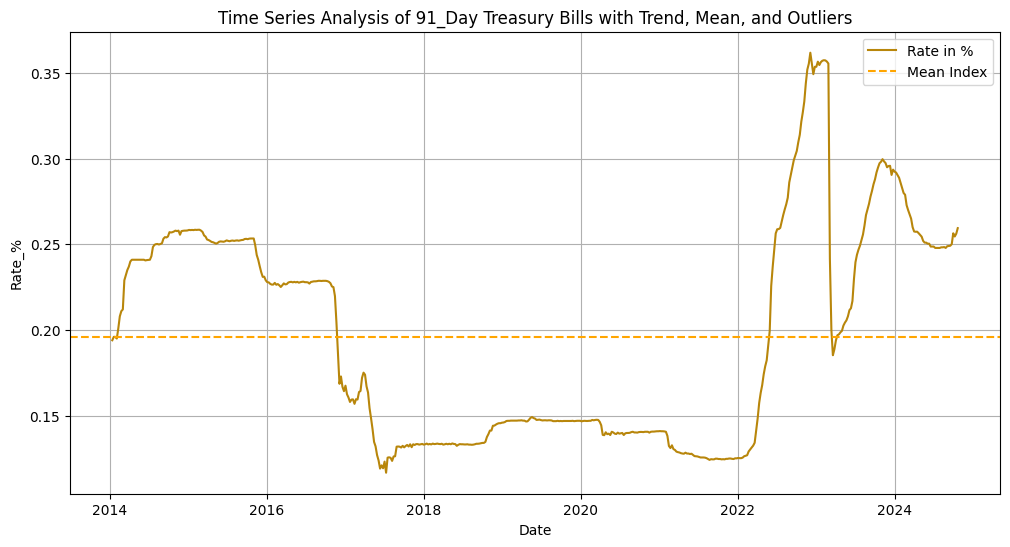

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Convert 'na' values to NaN
data['Rate'] = pd.to_numeric(data['Rate'], errors='coerce')

# Calculate the mean of the Index
mean_index = data['Rate'].mean()

# Identify outliers
std_index = data['Rate'].std()
data['Outlier'] = np.abs(data['Rate'] - mean_index) > 2 * std_index

# Drop rows with NaN values in 'Rate_%' column
data.dropna(subset=['Rate'], inplace=True)

# Plot time series data
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['Rate'], label='Rate in %', color='darkgoldenrod')

# Add mean line and optional outliers
plt.axhline(y=mean_index, color='orange', linestyle='--', label='Mean Index')
# plt.scatter(data[data['Outlier']].index, data[data['Outlier']]['Rate_%'], color='brown', label='Outliers')

# Label and show plot
plt.xlabel('Date')
plt.ylabel('Rate_%')
plt.title('Time Series Analysis of 91_Day Treasury Bills with Trend, Mean, and Outliers')
plt.legend()
plt.grid(True)
plt.show()


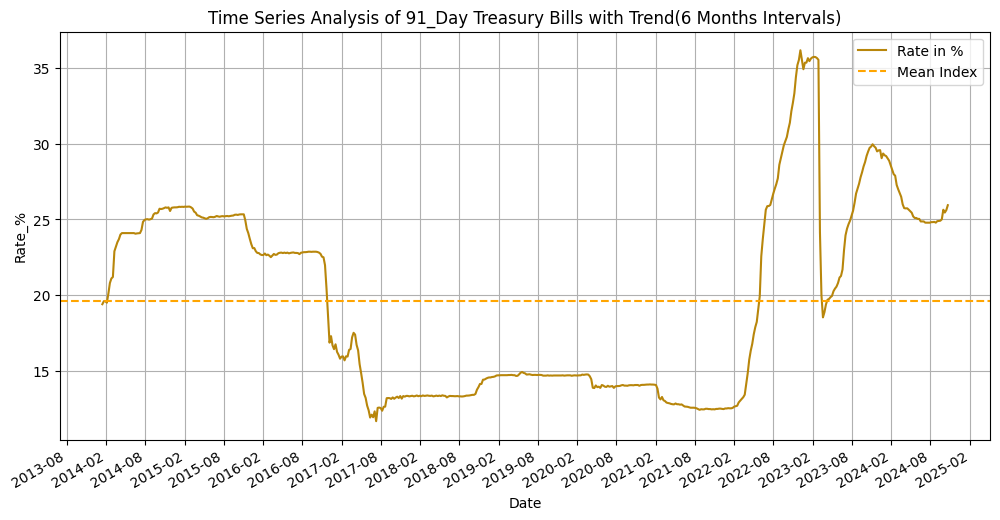

In [ ]:


# Assuming your DataFrame is named 'data' and has a 'Date' column

plt.figure(figsize=(12, 6))
plt.plot(data['Date'], data['Rate_%'], label='Rate in %', color='darkgoldenrod')

# Add mean line and optional outliers
plt.axhline(y=mean_index, color='orange', linestyle='--', label='Mean Index')
# plt.scatter(data[data['Outlier']].index, data[data['Outlier']]['Rate_%'], color='brown', label='Outliers')

# Label and show plot
plt.xlabel('Date')
plt.ylabel('Rate_%')
plt.title('Time Series Analysis of 91_Day Treasury Bills with Trend(6 Months Intervals)')
plt.legend()
plt.grid(True)

# Customize the x-axis to display dates better (optional)
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=6)) # Show every 3 months
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.gcf().autofmt_xdate()  # Rotate x-axis labels for better readability

plt.show()

In [ ]:
data.tail()

,Rate,Outlier
Date,,
2024-09-23,0.250104,False
2024-09-30,0.256439,False
2024-10-07,0.254568,False
2024-10-14,0.256182,False
2024-10-21,0.259444,False


### Vasicek Modeling for the Treasuring Rate

In [ ]:
!pip install QuantLib
!pip install QuantLib-Python

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.6/19.6 MB 25.6 MB/s eta 0:00:00


In [ ]:
import QuantLib as ql
import numpy as np
import datetime as dtm


class BrownianMotion:
    """
    Simulates a Brownian motion path using QuantLib.
    """

    def __init__(self, timestep, numPaths, seed=None):
        self.timestep = timestep
        self.numPaths = numPaths
        self.seed = seed

    def simulate(self):
        """
        Simulates the Brownian motion paths.

        Returns:
            A NumPy array of shape (numPaths, numSteps) containing the simulated paths.
        """

        # Set the random number generator seed if provided
        if self.seed is not None:
            ql.UniformRandomSequenceGenerator(self.numPaths, ql.UniformRandomGenerator(self.seed))

        # Create a Brownian motion process
        process = ql.GaussianPathGenerator(self.timestep, 1, ql.InverseCumulativeNormal())

        # Generate the paths
        paths = [process.next().value() for _ in range(self.numPaths)]

        return np.array(paths)

class ZeroCouponBond:
    def __init__(self, face_value, maturity_date, discount_rate):
        """
        Initializes a ZeroCouponBond object.

        Args:
            face_value (float): The face value of the bond.
            maturity_date (datetime.date): The maturity date of the bond.
            discount_rate (float): The discount rate used to calculate the present value.
        """
        self.face_value = face_value
        self.maturity_date = maturity_date
        self.discount_rate = discount_rate

    def present_value(self, valuation_date):
        """
        Calculates the present value of the bond.

        Args:
            valuation_date (datetime.date): The date on which the present value is calculated.

        Returns:
            float: The present value of the bond.
        """
        time_to_maturity = (self.maturity_date - valuation_date).days / 365.25  # Time in years
        present_value = self.face_value / (1 + self.discount_rate) ** time_to_maturity
        return present_value

In [ ]:
from numpy import random as rn
import datetime as dtm



from IPython.display import display, Math, Latex

a = -0.137147124953583
b = -0.00179029708250429
σ = 0.001866047835164

# Rate as of today
r0 = [0.2594, 0.2700]

T = 1
N = 12 # 12 months interval

δt = T/N
δt

0.08333333333333333

In [ ]:
# 50,000 randoms values for simulation
M = int(5*1e4)
M

50000

In [ ]:
dz = rn.randn(M,N)

In [ ]:
r = np.zeros((M, N + 1, len(r0)))  # Initialize a 3D array with zeros
for i in range(len(r0)):
    r[:, :, i] = r0[i]  # Assign initial rates for each scenario